# Bonus task
### Ostapovich Oleg

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
% matplotlib inline

UsageError: Line magic function `%` not found.


### 1. Data Loading
In cell below all .csv files will be loaded and concatenated together

In [59]:
folder_path = 'data'
file_list = glob.glob(folder_path + "/*.csv")
data = pd.DataFrame(pd.read_csv(file_list[0]))
for i in range(1, len(file_list)):
    df = pd.DataFrame(pd.read_csv(file_list[i]))
    data = pd.concat([data, df], axis=0)
data.head()

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp,device
0,0302549e-5522-43e5-b2f2-0b470932a6fd,b3aebc80-ff28-4569-bd18-2ace692f668e,0.0,30.0,3636.0,64.0,2022-09-01 00:00:00,Windows
1,0302549e-5522-43e5-b2f2-0b470932a6fd,b3aebc80-ff28-4569-bd18-2ace692f668e,0.0,30.0,3418.0,66.0,2022-09-01 00:00:05,Windows
2,0302549e-5522-43e5-b2f2-0b470932a6fd,b3aebc80-ff28-4569-bd18-2ace692f668e,0.0,30.0,3596.0,62.0,2022-09-01 00:00:10,Windows
3,0302549e-5522-43e5-b2f2-0b470932a6fd,b3aebc80-ff28-4569-bd18-2ace692f668e,0.0,30.0,3304.0,64.0,2022-09-01 00:00:15,Windows
4,0302549e-5522-43e5-b2f2-0b470932a6fd,b3aebc80-ff28-4569-bd18-2ace692f668e,0.0,30.0,2893.0,64.0,2022-09-01 00:00:20,Windows


### 2. Data Preprocessing
In cell below two subdatasets was created:
 1. timeset - containing time
 2. cleardata - containing scaled and encoded data

In [60]:
time_set = pd.to_datetime(data.iloc[:, 6])  # changes data format from 'str' to 'datetime' in 'timestamp' column
data.drop(['timestamp', 'client_user_id'], inplace=True, axis=1)

labele = LabelEncoder()
data['device'] = labele.fit_transform(data['device'])  # encode string classes
clear_data = data.drop(['session_id'], axis=1)  # create 'only values' dataset
clear_data = StandardScaler().fit_transform(clear_data)  # scales clear data

In cell below, subsequencedata is variable that consist all subsequences with length of 24

In [61]:
subsequence_data = np.array([])
for i in data['session_id'].unique():
    session = clear_data[data['session_id'] == i]  # get session from data
    session = session[:-(session.shape[
                             0] % 24)]  # drop last lines in every session which will prevent splitting the dataset to subsequences with length 24
    subsequence_data = np.concatenate((subsequence_data, session), axis=0) if len(subsequence_data) != 0 else session

## Principal Component Analysis
### 3. Feature selection using PCA


In [62]:
pca = PCA(n_components=1)
subsequence_data_PCA = pca.fit_transform(subsequence_data)  # PCA on whole dataset

### 4. Preparing for KMeans with PCA
1. Reshape subsequencedata to represent every subsequence as multidimensional point
2. Use elbow method to find optimal value of k for KMeans

In [63]:
subsequence_data_PCA_T = subsequence_data_PCA.reshape(-1, 24)

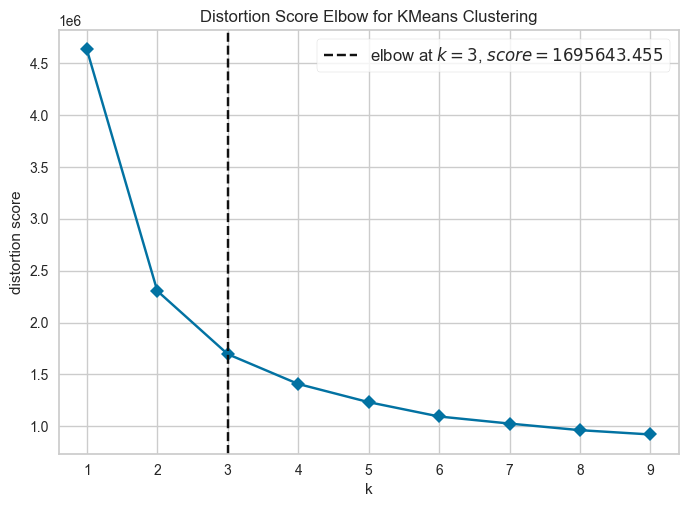

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
# Fit data to visualizer
visualizer.fit(subsequence_data_PCA_T)
# Finalize and render figure
visualizer.show()

### 5. KMeans with PCA


In [65]:
kmeans = KMeans(init="random", n_clusters=3, random_state=42)
label = kmeans.fit_predict(subsequence_data_PCA_T)
unique_labels = np.unique(label)

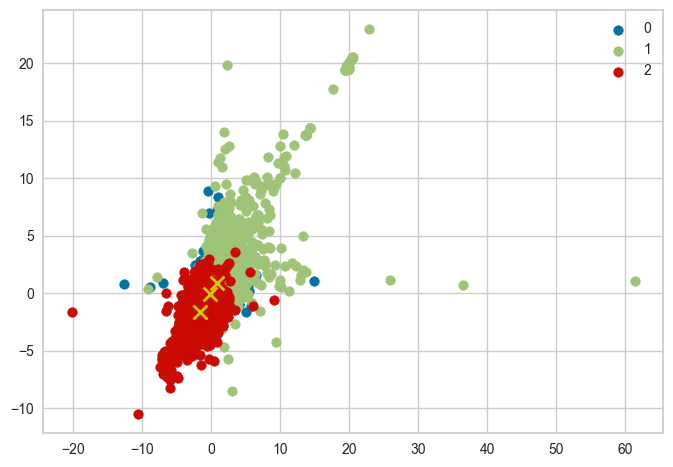

In [66]:
# Plotting results
X_COLUMN, Y_COLUMN = 0, 1 # This constants describe which dimension needs to be plotted

for i in unique_labels:
    plt.scatter(subsequence_data_PCA_T[label == i, X_COLUMN], subsequence_data_PCA_T[label == i, Y_COLUMN], label=i) # Plot points
plt.scatter(kmeans.cluster_centers_[:, X_COLUMN], kmeans.cluster_centers_[:, Y_COLUMN], marker='x', s=100, color='y', # Plot cluster centres
            linewidths=2)
plt.legend()
plt.show()

### 6. Metrics for KMeans on PCA

Inter cluster distance

In [67]:
dists = euclidean_distances(kmeans.cluster_centers_)
dists.mean()

5.440492945179951

Sum of within cluster variance

In [68]:
kmeans.inertia_

1695644.8737951058

## Discrete Fourier Transform
### 7. Feature selection using DFT

In [69]:
subsequence_data_DFT = np.fft.rfftn(subsequence_data, (subsequence_data.shape[0], 1)).real

### 8. Preparing for KMeans with DFT
1. Reshape subsequencedata to represent every subsequence as multidimensional point
2. Use elbow method to find optimal value of k for KMeans

In [70]:
subsequence_data_DFT_T = subsequence_data_DFT.reshape(-1, 24)

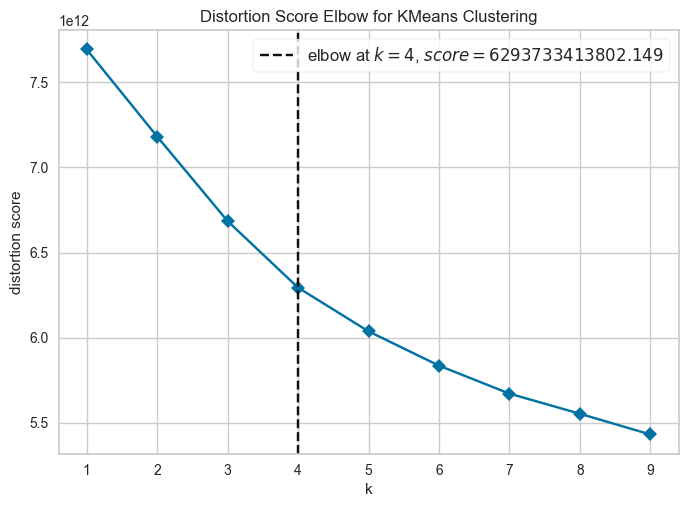

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
# Fit data to visualizer
visualizer.fit(subsequence_data_DFT_T)
# Finalize and render figure
visualizer.show()

### 9. KMeans with DFT

In [72]:
kmeans = KMeans(init="random", n_clusters=4, random_state=42)
label = kmeans.fit_predict(subsequence_data_DFT_T)
unique_labels = np.unique(label)

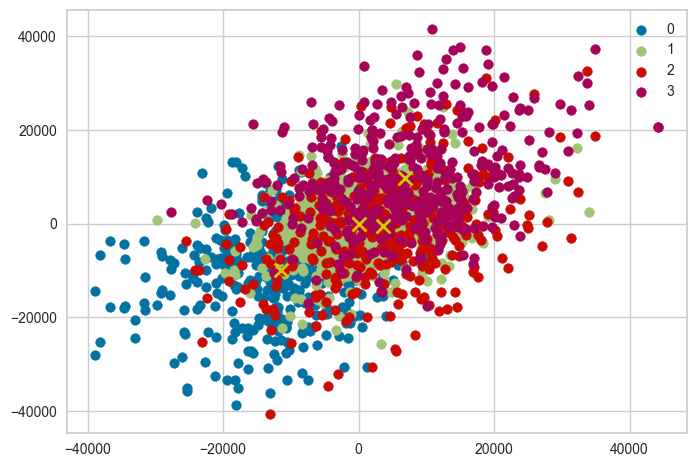

In [73]:
# Plotting results
X_COLUMN, Y_COLUMN = 0, 1 # This constants describe which dimension needs to be plotted

for i in unique_labels:
    plt.scatter(subsequence_data_DFT_T[label == i, X_COLUMN], subsequence_data_DFT_T[label == i, Y_COLUMN], label=i) # Plot points
plt.scatter(kmeans.cluster_centers_[:, X_COLUMN], kmeans.cluster_centers_[:, Y_COLUMN], marker='x', s=100, color='y', # Plot cluster centres
            linewidths=2)
plt.legend()
plt.show()

### 10. Metrics for KMeans on DFT

Inter cluster distance:

In [74]:
dists = euclidean_distances(kmeans.cluster_centers_)
dists.mean()

34108.95706141617

Sum of within cluster variance:

In [75]:
kmeans.inertia_

6302723645110.828

### Conclusion
In task 1 dataset was merged from 30 .csv files.

Merged dataset was preprocessed: outliers were removed using zscore, categorical data was encoded using LabelEncoder, dataset was normalized with StandardScaler, data features were extracted using PCA and DFT.
Dataset was splitted into equal subsequences with length of 24.
Elbow method was used to find optimum number of clusters.
KMeans clustering was used to cluster subsequences. Clusters containing 24-dimensional points were plotted on 2D-figures and their metrics were computed.